In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv("./train.csv")
print(data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [48]:
data = np.array(data)
m,n = data.shape #m rows = number of examples // 784 columns pixels per example
np.random.shuffle(data)


data_dev = data[0:1000].T

Y_dev = data_dev[0]
X_dev = data[1:n]
X_dev = X_dev / 255. #colour values between 0-1

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape # _ is number of pixels per example, m_train is number of exmaples in train set


41000


In [51]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 #accroding to correct dimensions
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

[[0.5142309 ]
 [0.66886061]
 [0.79039048]
 [0.74833917]
 [0.99559411]
 [0.5654069 ]
 [0.74459636]
 [0.77880361]
 [0.47373783]
 [0.71615955]]


In [52]:
#activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [83]:
#forward propagation

def forward_prop(W1, b1, W2, b2, X):
    Z1= W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2 


[[ 0.14844032 -0.11630595  0.4103936   0.27501787  0.0338919 ]
 [-0.38881469  0.22582954  0.35980048  0.45563999 -0.4167328 ]
 [ 0.47218745  0.36510249  0.14585716 -0.03414061  0.48668599]
 [-0.29980722  0.14038516 -0.23766443 -0.25740846 -0.09477161]
 [ 0.08670365  0.35714291 -0.22788349  0.47925779  0.44377291]]
[[0.14844032 0.         0.4103936  0.27501787 0.0338919 ]
 [0.         0.22582954 0.35980048 0.45563999 0.        ]
 [0.47218745 0.36510249 0.14585716 0.         0.48668599]
 [0.         0.14038516 0.         0.         0.        ]
 [0.08670365 0.35714291 0.         0.47925779 0.44377291]]


In [92]:
#ReLU deriv
def ReLU_deriv(Z):
    return Z > 0

In [91]:
#onehot
#transform labels to work with
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [84]:
#backwards_propagation
def backward_prop(Z1, A1, Z2, A2, W1,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m* dZ2.dot(A1.T)
    db2 = 1/ m*np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [94]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_decent(X,Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2,b2,X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha )
        
        #get info
        if i % 10 == 0:
            print("iterations: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
        
            

In [95]:
W1, b1, W2, b2 = gradient_decent(X_train, Y_train, 0.10, 500)

iterations:  0
[5 8 7 ... 8 8 8] [3 0 4 ... 9 0 2]
0.10804878048780488
iterations:  10
[5 6 9 ... 8 0 8] [3 0 4 ... 9 0 2]
0.20946341463414633
iterations:  20
[5 6 9 ... 8 0 8] [3 0 4 ... 9 0 2]
0.31626829268292683
iterations:  30
[5 6 9 ... 4 0 2] [3 0 4 ... 9 0 2]
0.3979268292682927
iterations:  40
[5 3 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.4595365853658537
iterations:  50
[5 3 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.5083658536585366
iterations:  60
[3 3 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.5513658536585366
iterations:  70
[3 0 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.5872439024390244
iterations:  80
[3 0 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.6174634146341463
iterations:  90
[3 0 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.6417804878048781
iterations:  100
[3 0 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.6626829268292683
iterations:  110
[3 0 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.6803902439024391
iterations:  120
[3 0 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.6956585365853658
iterations:  130
[3 0 9 ... 9 0 2] [3 0 4 ... 9 0 2]
0.7090487804878048


In [111]:
def make_predictions(X, W1, b1, W2, b2):
    _,_,_, A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1,b1,W2,b2):
    current_image = X_train[:, index, None]
    print(current_image.shape)
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Predictions: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = "nearest")
    plt.show
    

(784, 1)
Predictions:  [3]
Label:  3
(784, 1)
Predictions:  [0]
Label:  0
(784, 1)
Predictions:  [4]
Label:  4
(784, 1)
Predictions:  [9]
Label:  9
(784, 1)
Predictions:  [5]
Label:  5
(784, 1)
Predictions:  [6]
Label:  6
(784, 1)
Predictions:  [3]
Label:  3
(784, 1)
Predictions:  [2]
Label:  7
(784, 1)
Predictions:  [2]
Label:  2
(784, 1)
Predictions:  [0]
Label:  0


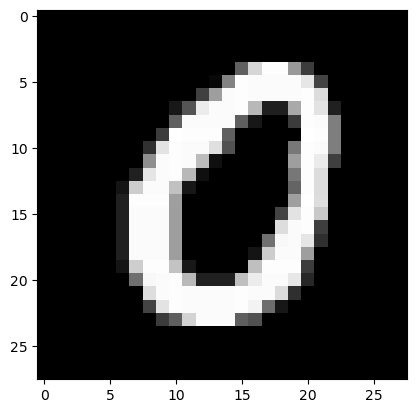

In [118]:
#testing
#test_prediction(0, W1, b1, W2, b2)
for i in range(10):
    test_prediction(i, W1, b1, W2, b2)